In [1]:
import sys 
sys.path.append('../Data_storage/')
sys.path.append('../Code_Base')

In [2]:
import os

In [3]:
from essential_imports import *


import pandas as pd
import numpy as np
import matplotlib as plt
import pandas_profiling
import warnings



In [4]:
from coin_information import *

In [5]:
from statsmodels.tsa.stattools import adfuller 

In [6]:
from matplotlib.pylab import rcParams 

In [7]:
rcParams['figure.figsize'] = 20,10

In [8]:
warnings.filterwarnings('ignore')

In [9]:
from statsmodels.tsa.arima_model import ARIMA

## Testing RA of XRP and trading strategy

In [10]:
XRP = []
for myf in open('../Data_storage/XRP_5min_Freq.txt'):
    XRP.append(myf.replace('\n',''))

In [11]:
XRP_Data = []
for E in XRP:
    XRP_Temp = pd.read_csv('../Data_storage/Coin_Data_5min/{0}.csv'.format(E))
    XRP_Data.append(XRP_Temp)

In [12]:
XRP_Data = pd.concat(XRP_Data)

In [13]:
XRP_Data['datetime_real'] = XRP_Data['date'].apply(lambda x: datetime.fromtimestamp(x))

In [14]:
XRP_Data = XRP_Data[XRP_Data['date'] != 0]

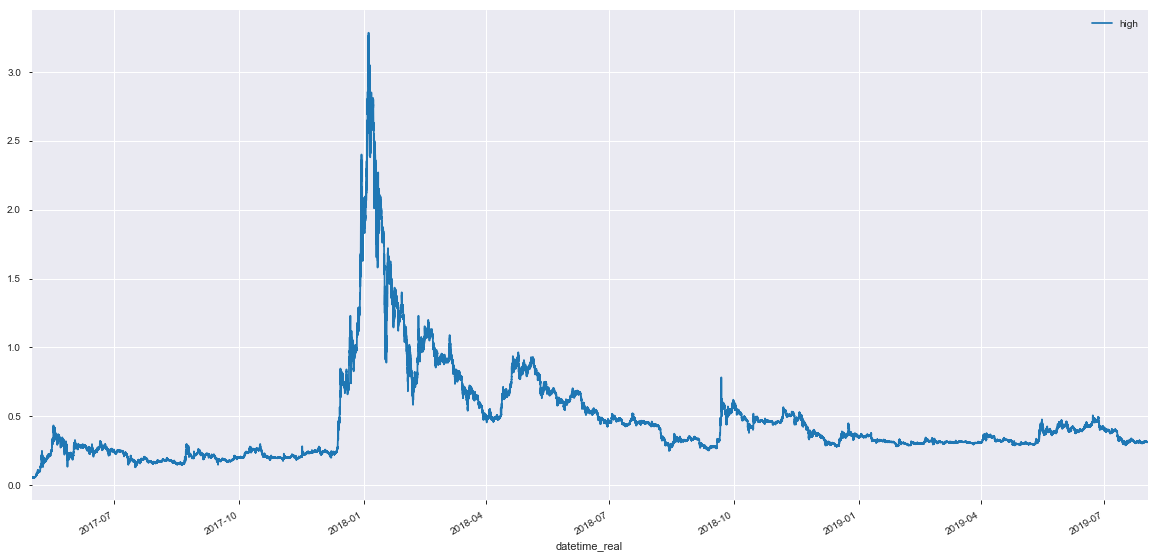

In [15]:
XRP_Data[XRP_Data['datetime_real'] > '2017-05-01'][['high','datetime_real']].set_index('datetime_real').plot(figsize= (20,10))

In [16]:
for Hour in [12,24,24*7]:
    XRP_Data['{}H_RA_on_Close'.format(Hour)] = XRP_Data['close'].rolling( Hour*2).mean()

In [17]:
After_Traction = XRP_Data['datetime_real'] >= '2017-05-01'

### By week

In [18]:
len(XRP_Data[After_Traction])/10

23703.6

In [20]:
# steps = 500
# final_row = int(len(XRP_Data[After_Traction]) - steps)
# for start in np.arange(0,final_row, steps):
#     end = start + steps
# #     print(start, end)
#     XRP_Data[After_Traction][['high','low','close','datetime_real','12H_RA_on_Close','24H_RA_on_Close','168H_RA_on_Close']][int(start) : int(end)].set_index('datetime_real').plot(title = '{} - {}'.format(start, end))

- lowest every 1.5 Days, max 2 days 

^ test this hypothesis

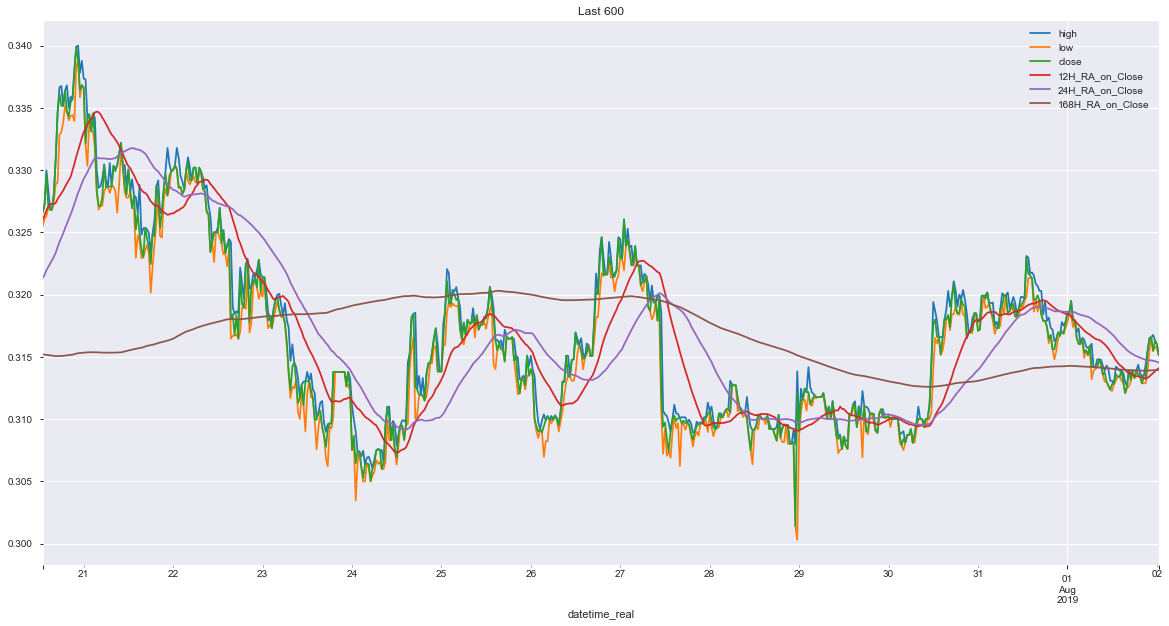

In [42]:
XRP_Data[After_Traction][['high','low','close','datetime_real','12H_RA_on_Close','24H_RA_on_Close','168H_RA_on_Close']][-600:].set_index('datetime_real').plot(title = '{}'.format('Last 600'))

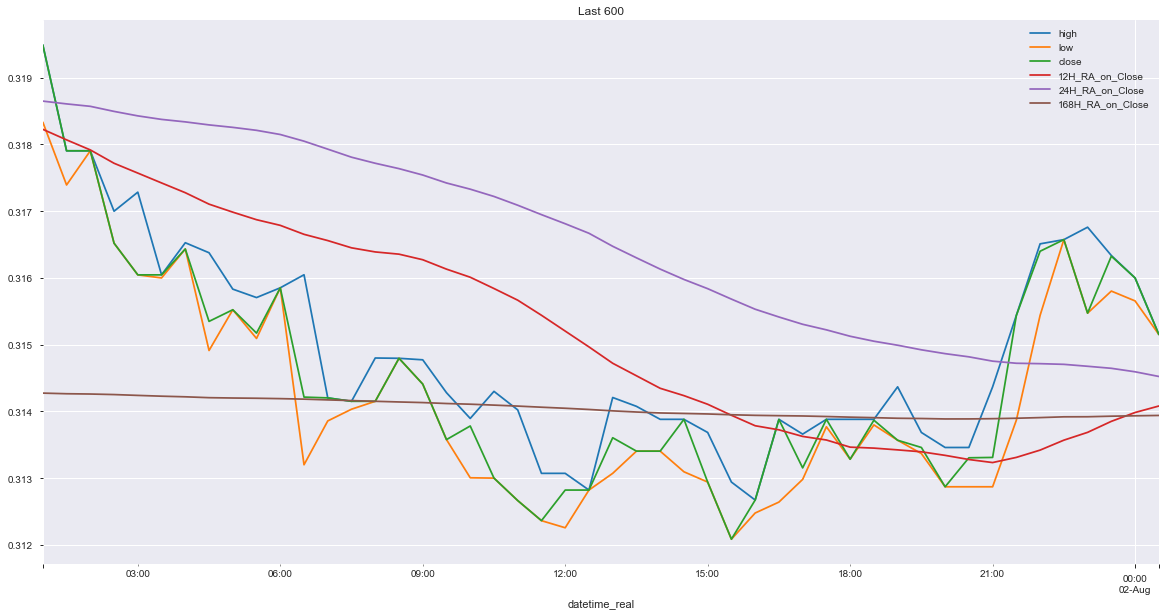

In [43]:
XRP_Data[After_Traction][['high','low','close','datetime_real','12H_RA_on_Close','24H_RA_on_Close','168H_RA_on_Close']][-48:].set_index('datetime_real').plot(title = '{}'.format('Last 600'))

#### A) For ever low point, what's the time it took for it to increase by 6% next, 
#### B) what's the time it took for it to decrease by 5% next

^ given the status, as long as first one is above second one then a profit can be made

if A > B, then more times to get 6% than 5%

In [26]:
def percent_change(percent,date_of_event, value_compare_to, direction, data_supplied ):
    
    #print(date_of_event)
    XRP_Data = data_supplied
    
    "next time it was increased by {0}%".format(percent)
    #print(date_of_event)
    if direction.lower() == 'increase':
        change = value_compare_to* (1+ percent*0.01)
        
        if len(XRP_Data[(XRP_Data['date'] > date_of_event) & (XRP_Data['high'] >= change) ]) == 0:
            return 3456789123
        else:
            return XRP_Data[(XRP_Data['date'] > date_of_event) & (XRP_Data['high'] >= change) ].iloc[[0]]['date'].values[0]
    
    else:
        change = value_compare_to* (1- percent*0.01)
        
        if len(XRP_Data[(XRP_Data['date'] > date_of_event) & (XRP_Data['low'] <= change) ]) == 0:
            return 3456789123
        else:
            return XRP_Data[(XRP_Data['date'] > date_of_event) & (XRP_Data['low'] <= change) ].iloc[[0]]['date'].values[0]

In [20]:
# XRP_Data['Increase_6_percent'] = XRP_Data.apply(lambda x : percent_change(6, x['date'], x['low'], 'increase'), axis = 1)

# XRP_Data['Decrease_5_percent'] = XRP_Data.apply(lambda x : percent_change(5, x['date'], x['low'], 'decrease'), axis = 1)

In [29]:
for increase in np.array([1,2,3,4,5,6,8,10,15])*0.1:
    print(increase)
    XRP_Data['Increase_{0}_percent'.format(increase)] = XRP_Data.apply(lambda x : percent_change(increase, x['date'], x['low'], 'increase',XRP_Data), axis = 1)
XRP_Data.to_csv('XRP_5min_Increase_SmallAmount.csv')

0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.8
1.0
1.5


In [30]:
for decrease in np.array([1,2,3,4,5,6,8,10,15])*0.1:
    print(decrease)
    XRP_Data['Decrease_{0}_percent'.format(decrease)] = XRP_Data.apply(lambda x : percent_change(decrease, x['date'], x['low'], 'decrease',XRP_Data), axis = 1)
XRP_Data.to_csv('XRP_5min_Decrease_SmallAmount_5min.csv')

0.1


KeyboardInterrupt: 

In [ ]:
#1

In [ ]:
len(XRP_Data[(XRP_Data['Increase_6_percent'] - XRP_Data['date']) > 0])

In [ ]:
len(XRP_Data[(XRP_Data['Increase_6_percent'] - XRP_Data['date']) < 0])

In [49]:
XRP_Data.head()

,Unnamed: 0,close,date,high,low,open,quoteVolume,volume,weightedAverage,datetime_real,...,Increase_1_percent,Increase_2_percent,Increase_3_percent,Increase_4_percent,Increase_5_percent,Increase_6_percent,Increase_8_percent,Increase_10_percent,Increase_15_percent,Decrease_15_percent
0,0,0.024997,1424462400,0.024997,0.024997,0.024997,0.1467,0.003667,0.024997,2015-02-20 20:00:00,...,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1424464200
1,1,0.024997,1424464200,0.024997,0.024997,0.024997,0.0000,0.000000,0.024997,2015-02-20 20:30:00,...,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1424466000
2,2,0.024997,1424466000,0.024997,0.024997,0.024997,0.0000,0.000000,0.024997,2015-02-20 21:00:00,...,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1424467800
3,3,0.024997,1424467800,0.024997,0.024997,0.024997,0.0000,0.000000,0.024997,2015-02-20 21:30:00,...,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1424469600
4,4,0.024997,1424469600,0.024997,0.024997,0.024997,0.0000,0.000000,0.024997,2015-02-20 22:00:00,...,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1424471400


In [54]:
#XRP_Data.to_csv('XRP_NEW_2.csv')

In [21]:
XRP_Data.to_csv('XRP_NEW_decrease_stats.csv')

In [51]:
#new